We will do classification problem on bank data.where we will see if a customer will deposit or not

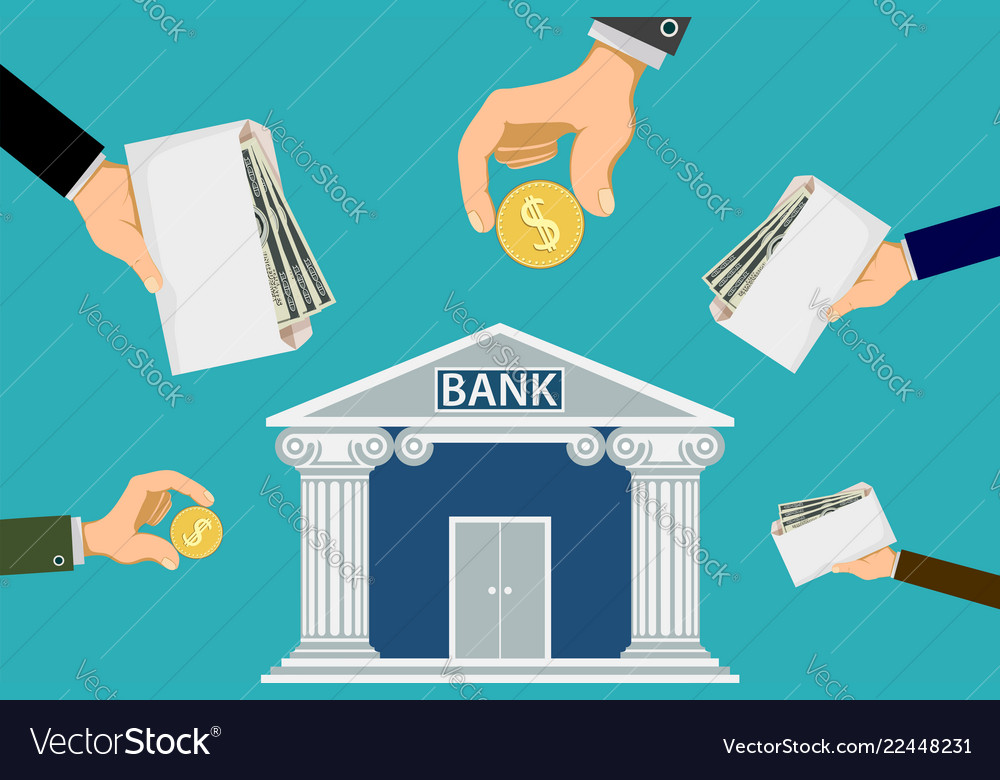

In [1]:
import os
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
os.listdir()

['.ipynb_checkpoints',
 'bank.xlsx',
 'decision tree.ipynb',
 'people-invest-or-deposit-money-in-a-bank-vector-22448231.jpg']

In [3]:
df=pd.read_excel('bank.xlsx')

Here our target variable is `deposit` 

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:'count'},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'percentage'},inplace=True)
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%'
    ff=pd.concat([f1,f2],axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f'Value count and %\n:',ff)


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
objects=df.dtypes[df.dtypes=='object'].index

## Univariate Analysis

In [8]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:'count'},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'percentage'},inplace=True)
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%'
    ff=pd.concat([f1,f2],axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f'Value count and %\n:',ff)
    sns.countplot(data=data,x=x)
    plt.show()


Total missing values : 0

Total count of unique categories: 12

Unique categories :
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Value count and %
:                count percentage
management      2566     22.99%
blue-collar     1944     17.42%
technician      1823     16.33%
admin.          1334     11.95%
services         923      8.27%
retired          778      6.97%
self-employed    405      3.63%
student          360      3.23%
unemployed       357       3.2%
entrepreneur     328      2.94%
housemaid        274      2.45%
unknown           70      0.63%


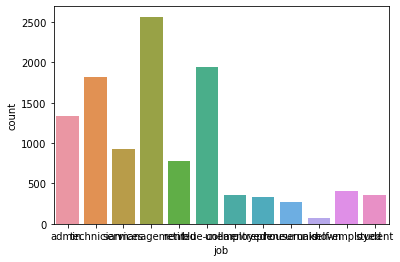

In [9]:
univariate_cat(data=df,x='job')

In [10]:
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

here we will make group of different job into some category

In [11]:
df['job']=df['job'].replace(['management','admin.'],'White-collar')
df['job']=df['job'].replace(['services','housemaid'],'Pink-collar')
df['job']=df['job'].replace(['retired','student','unemployed','unknown'],'others')
df['job']=df['job'].replace(['self-employed','entrepreneur'],'self-depend')

In [12]:
df.job.unique()

array(['White-collar', 'technician', 'Pink-collar', 'others',
       'blue-collar', 'self-depend'], dtype=object)

Total missing values : 0

Total count of unique categories: 6

Unique categories :
['White-collar', 'technician', 'Pink-collar', 'others', 'blue-collar', 'self-depend']
Value count and %
:               count percentage
White-collar   3900     34.94%
blue-collar    1944     17.42%
technician     1823     16.33%
others         1565     14.02%
Pink-collar    1197     10.72%
self-depend     733      6.57%


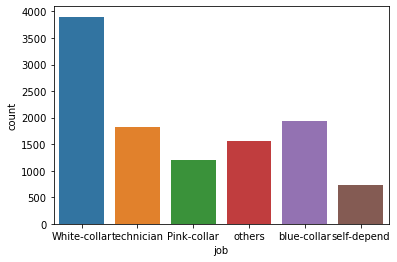

In [13]:
univariate_cat(data=df,x='job')

In [14]:
objects

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['married', 'single', 'divorced']
Value count and %
:           count percentage
married    6351      56.9%
single     3518     31.52%
divorced   1293     11.58%


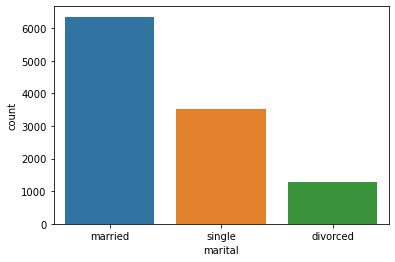

In [15]:
univariate_cat(data=df,x='marital')

In [16]:
objects

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['secondary', 'tertiary', 'primary', 'unknown']
Value count and %
:            count percentage
secondary   5476     49.06%
tertiary    3689     33.05%
primary     1500     13.44%
unknown      497      4.45%


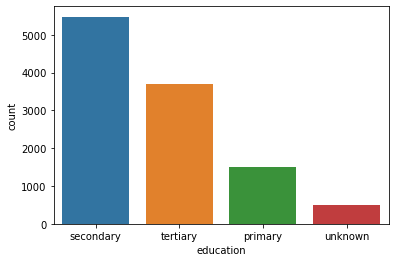

In [17]:
univariate_cat(data=df,x='education')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
:      count percentage
no   10994     98.49%
yes    168      1.51%


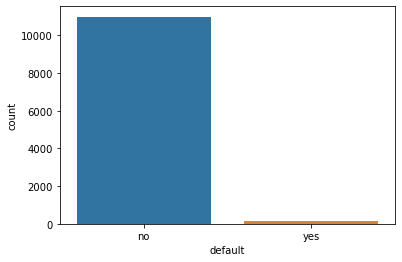

In [18]:
univariate_cat(data=df,x='default')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
:      count percentage
no    5881     52.69%
yes   5281     47.31%


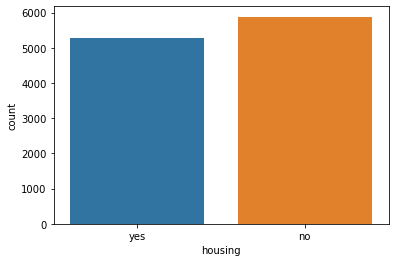

In [19]:
univariate_cat(data=df,x='housing')

In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,White-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,White-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,White-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,Pink-collar,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#### Bivariate analysis

In [21]:
pd.crosstab(df['contact'],df['deposit'],normalize='index')

deposit,no,yes
contact,,
cellular,0.456727,0.543273
telephone,0.496124,0.503876
unknown,0.774084,0.225916


In [22]:
df.drop('contact',axis=1,inplace=True)

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,White-collar,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,White-collar,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,White-collar,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes


Total missing values : 0

Total count of unique categories: 12

Unique categories :
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
Value count and %
:      count percentage
may   2824      25.3%
aug   1519     13.61%
jul   1514     13.56%
jun   1222     10.95%
nov    943      8.45%
apr    923      8.27%
feb    776      6.95%
oct    392      3.51%
jan    344      3.08%
sep    319      2.86%
mar    276      2.47%
dec    110      0.99%


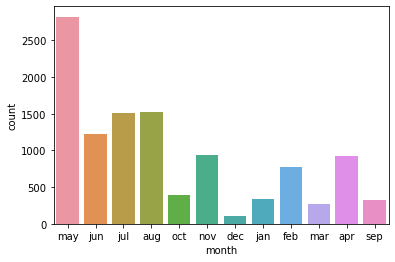

In [24]:
univariate_cat(data=df,x='month')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['unknown', 'other', 'failure', 'success']
Value count and %
:          count percentage
unknown   8326     74.59%
failure   1228      11.0%
success   1071       9.6%
other      537      4.81%


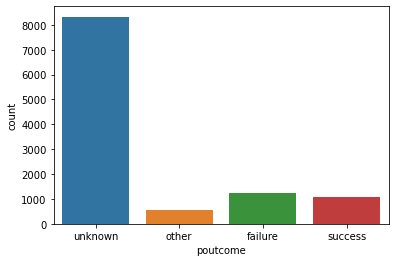

In [25]:
univariate_cat(data=df,x='poutcome')

Replacing unkown other with other in poutcome

In [26]:
df['poutcome']=df['poutcome'].replace(['unknown','other'],'other')

In [27]:
df.poutcome.unique()

array(['other', 'failure', 'success'], dtype=object)

In [28]:
objects

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
:      count percentage
no    5873     52.62%
yes   5289     47.38%


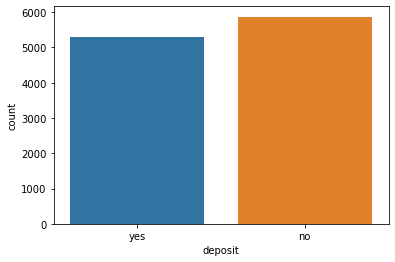

In [29]:
univariate_cat(data=df,x='deposit')

creating deposit variable into binary

In [30]:
df['deposit']=df['deposit'].map({'yes':1,'no':0})

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,White-collar,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,other,1
1,56,White-collar,married,secondary,no,45,no,no,5,may,1467,1,-1,0,other,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,other,1
3,55,Pink-collar,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,other,1
4,54,White-collar,married,tertiary,no,184,no,no,5,may,673,2,-1,0,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,-1,0,other,0
11158,39,Pink-collar,married,secondary,no,733,no,no,16,jun,83,4,-1,0,other,0
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,-1,0,other,0
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,172,5,failure,0


## UniVariate on num

In [32]:
def univariate_num(data,x):
    """one numerical variable analysis """
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    iqr=q3-q1
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt,'Interquartile range':iqr}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=df, y=data[x])
    plt.show()
    return myvalue

In [33]:
df.dtypes[df.dtypes!='object'].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

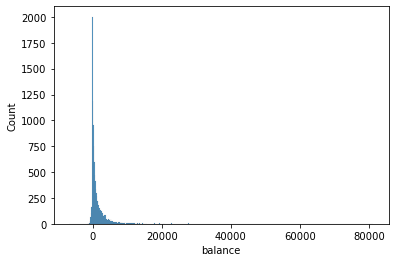

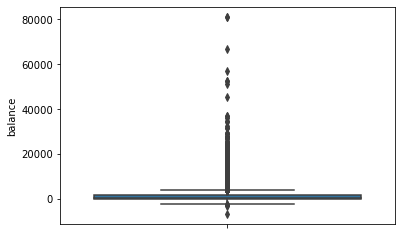

{'missing': 0,
 'min': -6847,
 'max': 81204,
 'mean': 1528.54,
 'var': 10403291.12,
 'std': 3225.41,
 'range': 88051,
 'q1': 122.0,
 'q2': 550.0,
 'q3': 1708.0,
 'skewness': 8.22,
 'kurtosis': 126.86,
 'Interquartile range': 1586.0}

In [34]:
univariate_num(data=df,x='balance')

In [35]:
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,White-collar,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,other,1
1,56,White-collar,married,secondary,no,45,no,no,5,may,1467,1,-1,0,other,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,other,1
3,55,Pink-collar,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,other,1
4,54,White-collar,married,tertiary,no,184,no,no,5,may,673,2,-1,0,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,-1,0,other,0
11158,39,Pink-collar,married,secondary,no,733,no,no,16,jun,83,4,-1,0,other,0
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,-1,0,other,0
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,172,5,failure,0


In [36]:
df.balance.value_counts()

 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64

In [37]:
df[df['balance']>2000].shape

(2442, 16)

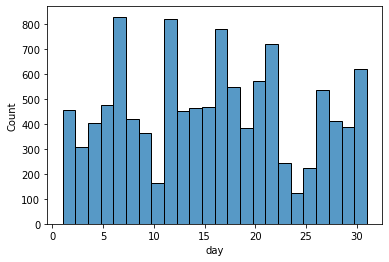

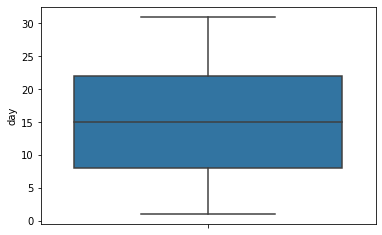

{'missing': 0,
 'min': 1,
 'max': 31,
 'mean': 15.66,
 'var': 70.91,
 'std': 8.42,
 'range': 30,
 'q1': 8.0,
 'q2': 15.0,
 'q3': 22.0,
 'skewness': 0.11,
 'kurtosis': -1.06,
 'Interquartile range': 14.0}

In [38]:
univariate_num(data=df,x='day')

In [39]:
df.drop('day',axis=1,inplace=True)

In [40]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,White-collar,married,secondary,no,2343,yes,no,may,1042,1,-1,0,other,1


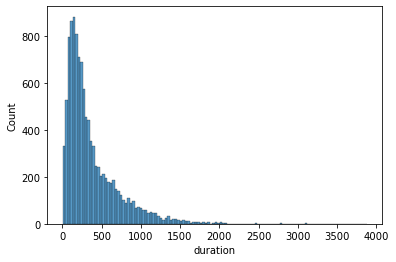

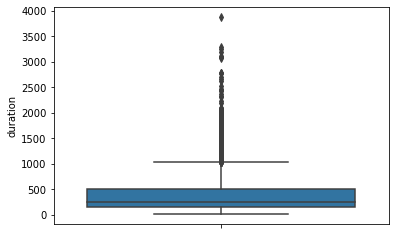

{'missing': 0,
 'min': 2,
 'max': 3881,
 'mean': 371.99,
 'var': 120498.12,
 'std': 347.13,
 'range': 3879,
 'q1': 138.0,
 'q2': 255.0,
 'q3': 496.0,
 'skewness': 2.14,
 'kurtosis': 7.3,
 'Interquartile range': 358.0}

In [41]:
univariate_num(data=df,x='duration')

In [42]:
3881/60 

64.68333333333334

In [43]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,White-collar,married,secondary,no,2343,yes,no,may,1042,1,-1,0,other,1
1,56,White-collar,married,secondary,no,45,no,no,may,1467,1,-1,0,other,1
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,-1,0,other,1
3,55,Pink-collar,married,secondary,no,2476,yes,no,may,579,1,-1,0,other,1
4,54,White-collar,married,tertiary,no,184,no,no,may,673,2,-1,0,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,apr,257,1,-1,0,other,0
11158,39,Pink-collar,married,secondary,no,733,no,no,jun,83,4,-1,0,other,0
11159,32,technician,single,secondary,no,29,no,no,aug,156,2,-1,0,other,0
11160,43,technician,married,secondary,no,0,no,yes,may,9,2,172,5,failure,0


In [43]:
df['campaign'].value_counts(normalize=True)

1     0.429851
2     0.271278
3     0.118348
4     0.069074
5     0.033865
6     0.023741
7     0.012453
8     0.011467
9     0.006450
10    0.004659
11    0.003584
13    0.002688
12    0.002598
14    0.001344
17    0.001254
15    0.001165
16    0.000806
18    0.000717
21    0.000717
20    0.000448
19    0.000448
24    0.000448
22    0.000358
30    0.000358
23    0.000269
25    0.000269
26    0.000269
32    0.000179
43    0.000179
29    0.000179
33    0.000090
28    0.000090
41    0.000090
27    0.000090
63    0.000090
31    0.000090
Name: campaign, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


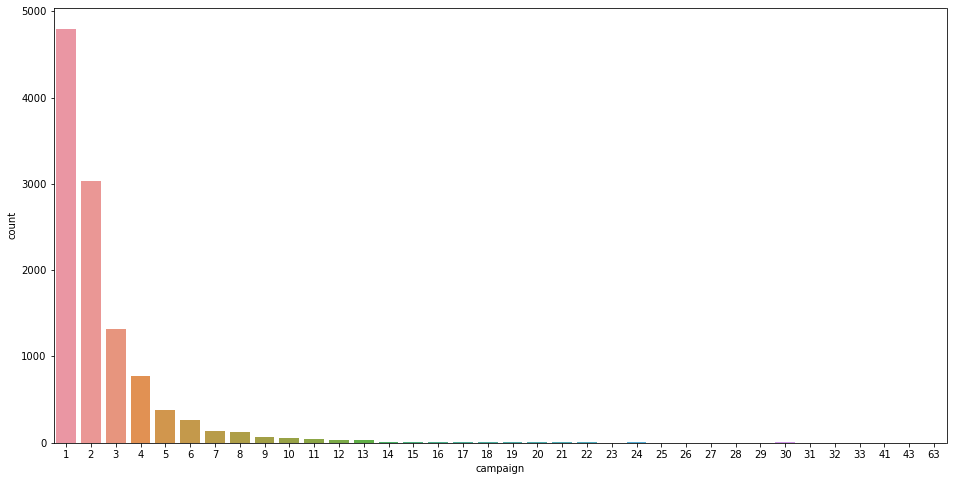

In [44]:
plt.figure(figsize=(16,8))
sns.countplot(df['campaign'])
plt.show()

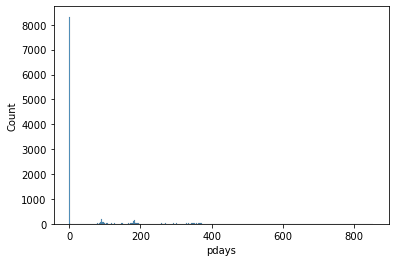

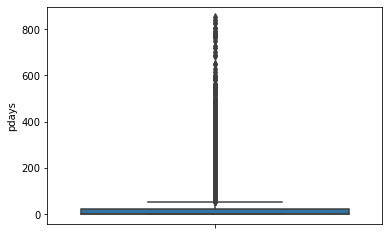

{'missing': 0,
 'min': -1,
 'max': 854,
 'mean': 51.33,
 'var': 11828.36,
 'std': 108.76,
 'range': 855,
 'q1': -1.0,
 'q2': -1.0,
 'q3': 20.75,
 'skewness': 2.45,
 'kurtosis': 6.84,
 'Interquartile range': 21.75}

In [45]:
univariate_num(data=df,x='pdays')

In [46]:
df['pdays'].value_counts(normalize=True)

-1      0.745744
 92     0.009497
 182    0.007973
 91     0.007526
 181    0.007257
          ...   
 437    0.000090
 728    0.000090
 518    0.000090
 828    0.000090
 118    0.000090
Name: pdays, Length: 472, dtype: float64

In [47]:
df.loc[df['pdays']==-1,'pdays']=999


In [48]:
df['recent_pdays']=1/df['pdays']

In [49]:
df.drop('pdays',axis=1,inplace=True)

In [50]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,White-collar,married,secondary,no,2343,yes,no,may,1042,1,0,other,1,0.001001
1,56,White-collar,married,secondary,no,45,no,no,may,1467,1,0,other,1,0.001001
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,0,other,1,0.001001
3,55,Pink-collar,married,secondary,no,2476,yes,no,may,579,1,0,other,1,0.001001
4,54,White-collar,married,tertiary,no,184,no,no,may,673,2,0,other,1,0.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,apr,257,1,0,other,0,0.001001
11158,39,Pink-collar,married,secondary,no,733,no,no,jun,83,4,0,other,0,0.001001
11159,32,technician,single,secondary,no,29,no,no,aug,156,2,0,other,0,0.001001
11160,43,technician,married,secondary,no,0,no,yes,may,9,2,5,failure,0,0.005814


## Bivariate analysis

In [51]:
# cat-cat
# cat-num
# num-num

In [52]:
objects

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [53]:
pd.crosstab(df['job'],df['deposit'])

deposit,0,1
job,,
Pink-collar,719,478
White-collar,1968,1932
blue-collar,1236,708
others,544,1021
self-depend,423,310
technician,983,840


here we can see most deposit are taken by white collar people
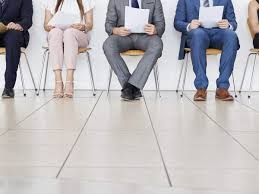

In [55]:
pd.crosstab(df['marital'],df['deposit'],normalize='index')

deposit,0,1
marital,,
divorced,0.518948,0.481052
married,0.566210,0.433790
single,0.456509,0.543491


single people are taking deposit more than married people

In [54]:
pd.crosstab(df['education'],df['deposit'],normalize='index')

deposit,0,1
education,,
primary,0.606000,0.394000
secondary,0.552593,0.447407
tertiary,0.458932,0.541068
unknown,0.492958,0.507042


In [55]:
pd.crosstab(df['default'],df['deposit'],normalize='index')

deposit,0,1
default,,
no,0.523649,0.476351
yes,0.690476,0.309524


In [58]:
pd.crosstab(df['housing'],df['deposit'],normalize='index')

deposit,0,1
housing,,
no,0.429689,0.570311
yes,0.633592,0.366408


people who dont have housing are taking deposit

In [59]:
pd.crosstab(df['loan'],df['deposit'],normalize='index')

deposit,0,1
loan,,
no,0.504741,0.495259
yes,0.668493,0.331507


here you can see people with no loan are taking deposit

In [56]:
# Bank deposit

In [57]:
objects

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [58]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,White-collar,married,secondary,no,2343,yes,no,may,1042,1,0,other,1,0.001001
1,56,White-collar,married,secondary,no,45,no,no,may,1467,1,0,other,1,0.001001
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,0,other,1,0.001001
3,55,Pink-collar,married,secondary,no,2476,yes,no,may,579,1,0,other,1,0.001001
4,54,White-collar,married,tertiary,no,184,no,no,may,673,2,0,other,1,0.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,apr,257,1,0,other,0,0.001001
11158,39,Pink-collar,married,secondary,no,733,no,no,jun,83,4,0,other,0,0.001001
11159,32,technician,single,secondary,no,29,no,no,aug,156,2,0,other,0,0.001001
11160,43,technician,married,secondary,no,0,no,yes,may,9,2,5,failure,0,0.005814


In [59]:
pd.crosstab(df['month'],df['deposit'],normalize='index')

deposit,0,1
month,,
apr,0.374865,0.625135
aug,0.547070,0.452930
dec,0.090909,0.909091
feb,0.431701,0.568299
jan,0.587209,0.412791
jul,0.585865,0.414135
jun,0.553191,0.446809
mar,0.101449,0.898551
may,0.672450,0.327550


In [60]:
pd.crosstab(df['poutcome'],df['deposit'],normalize='index')

deposit,0,1
poutcome,,
failure,0.496743,0.503257
other,0.583324,0.416676
success,0.086835,0.913165


In [61]:
# cat-num

In [62]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,White-collar,married,secondary,no,2343,yes,no,may,1042,1,0,other,1,0.001001
1,56,White-collar,married,secondary,no,45,no,no,may,1467,1,0,other,1,0.001001
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,0,other,1,0.001001
3,55,Pink-collar,married,secondary,no,2476,yes,no,may,579,1,0,other,1,0.001001
4,54,White-collar,married,tertiary,no,184,no,no,may,673,2,0,other,1,0.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,apr,257,1,0,other,0,0.001001
11158,39,Pink-collar,married,secondary,no,733,no,no,jun,83,4,0,other,0,0.001001
11159,32,technician,single,secondary,no,29,no,no,aug,156,2,0,other,0,0.001001
11160,43,technician,married,secondary,no,0,no,yes,may,9,2,5,failure,0,0.005814


In [63]:
df.corr()

,age,balance,duration,campaign,previous,deposit,recent_pdays
age,1.000000,0.112300,0.000189,-0.005278,0.020169,0.034901,0.018794
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,0.081129,-0.004979
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,0.451919,-0.014339
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,-0.128081,-0.024668
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,0.139867,0.114359
deposit,0.034901,0.081129,0.451919,-0.128081,0.139867,1.000000,0.031571
recent_pdays,0.018794,-0.004979,-0.014339,-0.024668,0.114359,0.031571,1.000000


In [64]:
# cat-num

In [65]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,White-collar,married,secondary,no,2343,yes,no,may,1042,1,0,other,1,0.001001
1,56,White-collar,married,secondary,no,45,no,no,may,1467,1,0,other,1,0.001001
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,0,other,1,0.001001
3,55,Pink-collar,married,secondary,no,2476,yes,no,may,579,1,0,other,1,0.001001
4,54,White-collar,married,tertiary,no,184,no,no,may,673,2,0,other,1,0.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,apr,257,1,0,other,0,0.001001
11158,39,Pink-collar,married,secondary,no,733,no,no,jun,83,4,0,other,0,0.001001
11159,32,technician,single,secondary,no,29,no,no,aug,156,2,0,other,0,0.001001
11160,43,technician,married,secondary,no,0,no,yes,may,9,2,5,failure,0,0.005814


In [66]:
df.groupby(['deposit']).agg({'age':['min','max','median','std','count']})

age                            
        min max median        std count
deposit                                
0        18  89   39.0  10.264815  5873
1        18  95   38.0  13.497781  5289

<AxesSubplot:xlabel='deposit'>

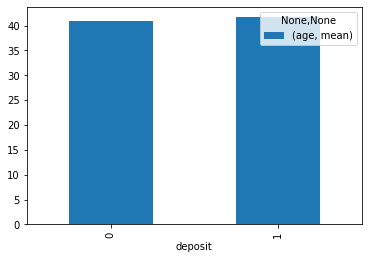

In [67]:
df.groupby(['deposit']).agg({'age':['mean']}).plot(kind='bar')

In [68]:
from scipy import stats

In [69]:
# null hypo: avg(non deposit)=avg(deposit)
# null hypo: avg(non deposit)<>avg(deposit)
# test:two sample ttest
# ci-95%
# # alpha=0.05
# if p value is greater than alpha :
#     null is accepted vice versa


In [70]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,White-collar,married,secondary,no,2343,yes,no,may,1042,1,0,other,1,0.001001
1,56,White-collar,married,secondary,no,45,no,no,may,1467,1,0,other,1,0.001001
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,0,other,1,0.001001
3,55,Pink-collar,married,secondary,no,2476,yes,no,may,579,1,0,other,1,0.001001
4,54,White-collar,married,tertiary,no,184,no,no,may,673,2,0,other,1,0.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,apr,257,1,0,other,0,0.001001
11158,39,Pink-collar,married,secondary,no,733,no,no,jun,83,4,0,other,0,0.001001
11159,32,technician,single,secondary,no,29,no,no,aug,156,2,0,other,0,0.001001
11160,43,technician,married,secondary,no,0,no,yes,may,9,2,5,failure,0,0.005814


In [71]:
dp=df[df['deposit']==1]
ndp=df[df['deposit']==0]


In [72]:
stats.ttest_ind(dp['age'],ndp['age'])

Ttest_indResult(statistic=3.6892130272779955, pvalue=0.00022601800590796526)

In [73]:
df.groupby(['deposit']).agg({'balance':['min','max','median','std','count','mean']})

balance                                              
            min    max median          std count         mean
deposit                                                      
0         -6847  66653  414.0  2933.411934  5873  1280.227141
1         -3058  81204  733.0  3501.104777  5289  1804.267915

In [74]:
stats.ttest_ind(dp['balance'],ndp['balance'])

Ttest_indResult(statistic=8.598842126021864, pvalue=9.126568254859532e-18)

In [75]:
# duration
df.groupby(['deposit']).agg({'duration':['min','max','median','std','count','mean']})

duration                                           
             min   max median         std count        mean
deposit                                                    
0              2  3284  163.0  208.577530  5873  223.130257
1              8  3881  426.0  392.525262  5289  537.294574

In [76]:
stats.ttest_ind(dp['duration'],ndp['duration'])

Ttest_indResult(statistic=53.51796190607506, pvalue=0.0)

In [77]:
# num-num

In [78]:
# businees knowledge is more important than data science


<AxesSubplot:xlabel='age', ylabel='balance'>

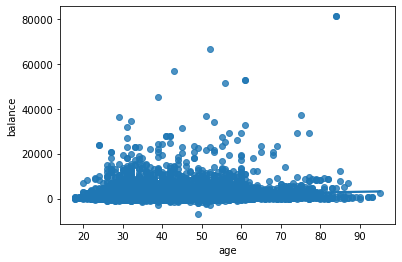

In [79]:
sns.regplot(data=df,x='age',y='balance')

In [80]:
df[['age','balance']].corr()

,age,balance
age,1.0000,0.1123
balance,0.1123,1.0000


<AxesSubplot:xlabel='age', ylabel='duration'>

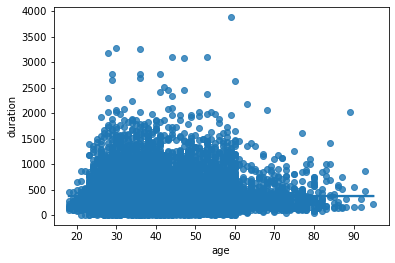

In [81]:
sns.regplot(data=df,x='age',y='duration')

In [82]:
df[['age','duration']].corr()

,age,duration
age,1.000000,0.000189
duration,0.000189,1.000000


<AxesSubplot:xlabel='balance', ylabel='duration'>

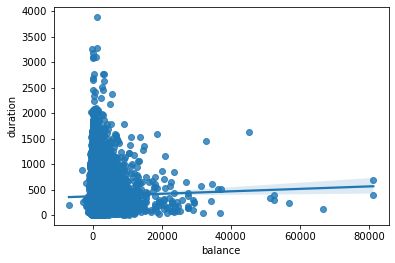

In [83]:
sns.regplot(data=df,x='balance',y='duration')

### Missing value Treatment

In [84]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
month           0
duration        0
campaign        0
previous        0
poutcome        0
deposit         0
recent_pdays    0
dtype: int64

***
* There is no missing value
***

### outlier Treatment 

<AxesSubplot:xlabel='age'>

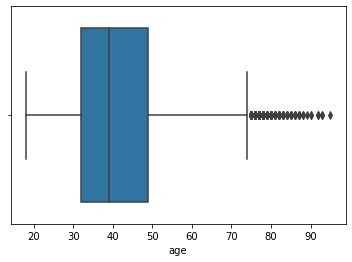

In [85]:
sns.boxplot(data=df,x='age')

### Tuckey method 

In [86]:
q1=df['age'].quantile(.25)
q3=df['age'].quantile(.75)

In [87]:
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)
df['age']=np.where(df['age']>=upper_cap,upper_cap,df['age'])
df['age']=np.where(df['age']<=lower_cap,lower_cap,df['age'])

<AxesSubplot:xlabel='age'>

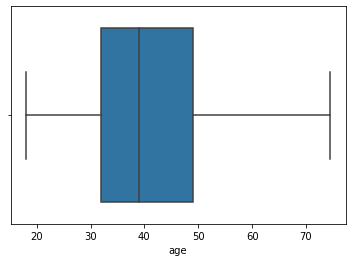

In [88]:
sns.boxplot(data=df,x='age')

In [89]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59.0,White-collar,married,secondary,no,2343,yes,no,may,1042,1,0,other,1,0.001001
1,56.0,White-collar,married,secondary,no,45,no,no,may,1467,1,0,other,1,0.001001
2,41.0,technician,married,secondary,no,1270,yes,no,may,1389,1,0,other,1,0.001001
3,55.0,Pink-collar,married,secondary,no,2476,yes,no,may,579,1,0,other,1,0.001001
4,54.0,White-collar,married,tertiary,no,184,no,no,may,673,2,0,other,1,0.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,apr,257,1,0,other,0,0.001001
11158,39.0,Pink-collar,married,secondary,no,733,no,no,jun,83,4,0,other,0,0.001001
11159,32.0,technician,single,secondary,no,29,no,no,aug,156,2,0,other,0,0.001001
11160,43.0,technician,married,secondary,no,0,no,yes,may,9,2,5,failure,0,0.005814


In [90]:
df['balance']=np.where(df['balance']<=0,0,df['balance'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

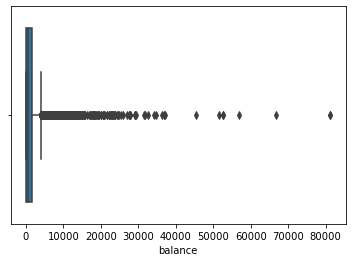

In [91]:
sns.boxplot(df['balance'])

In [92]:
var='balance'
q1=df[var].quantile(.25)
q3=df[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)
df[var]=np.where(df[var]>=upper_cap,upper_cap,df[var])
df[var]=np.where(df[var]<=lower_cap,lower_cap,df[var])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

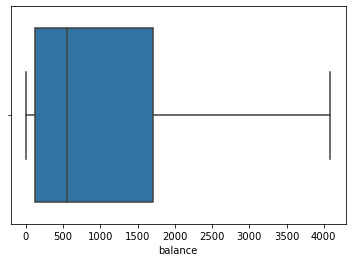

In [93]:
sns.boxplot(df['balance'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

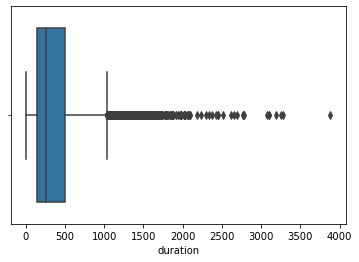

In [94]:
sns.boxplot(df['duration'])

In [95]:
var='duration'
q1=df[var].quantile(.25)
q3=df[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)
df[var]=np.where(df[var]>=upper_cap,upper_cap,df[var])
df[var]=np.where(df[var]<=lower_cap,lower_cap,df[var])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

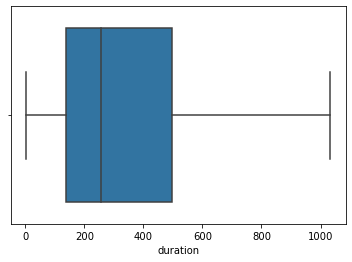

In [96]:
sns.boxplot(df['duration'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recent_pdays'>

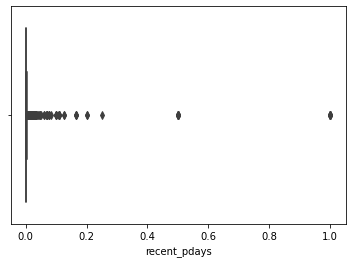

In [97]:
sns.boxplot(df['recent_pdays'])

In [98]:
var='recent_pdays'
q1=df[var].quantile(.25)
q3=df[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)
df[var]=np.where(df[var]>=upper_cap,upper_cap,df[var])
df[var]=np.where(df[var]<=lower_cap,lower_cap,df[var])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recent_pdays'>

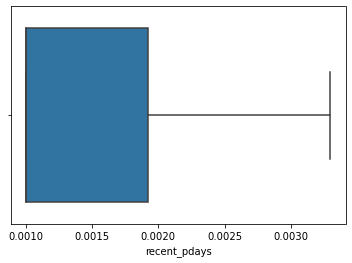

In [99]:
sns.boxplot(df['recent_pdays'])

In [100]:
# we usually use percentile

In [101]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59.0,White-collar,married,secondary,no,2343.0,yes,no,may,1033.0,1,0,other,1,0.001001
1,56.0,White-collar,married,secondary,no,45.0,no,no,may,1033.0,1,0,other,1,0.001001
2,41.0,technician,married,secondary,no,1270.0,yes,no,may,1033.0,1,0,other,1,0.001001
3,55.0,Pink-collar,married,secondary,no,2476.0,yes,no,may,579.0,1,0,other,1,0.001001
4,54.0,White-collar,married,tertiary,no,184.0,no,no,may,673.0,2,0,other,1,0.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1.0,yes,no,apr,257.0,1,0,other,0,0.001001
11158,39.0,Pink-collar,married,secondary,no,733.0,no,no,jun,83.0,4,0,other,0,0.001001
11159,32.0,technician,single,secondary,no,29.0,no,no,aug,156.0,2,0,other,0,0.001001
11160,43.0,technician,married,secondary,no,0.0,no,yes,may,9.0,2,5,failure,0,0.003297


### dummies

now we will create dummies 

In [102]:
bank1=pd.get_dummies(data=df,drop_first=True)

In [103]:
bank1.head()

,age,balance,duration,campaign,previous,deposit,recent_pdays,job_White-collar,job_blue-collar,job_others,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,59.0,2343.0,1033.0,1,0,1,0.001001,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,56.0,45.0,1033.0,1,0,1,0.001001,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,41.0,1270.0,1033.0,1,0,1,0.001001,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,55.0,2476.0,579.0,1,0,1,0.001001,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,54.0,184.0,673.0,2,0,1,0.001001,1,0,0,...,0,0,0,0,1,0,0,0,1,0


### model development

In [104]:
x=bank1.drop('deposit',axis=1)
y=bank1['deposit']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

we are using decision tree algorithm here 

we are using classifier because our target variable is classification

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

print('Train Accuracy',dt.score(x_train,y_train))
print('Train Accuracy',dt.score(x_test,y_test))

Train Accuracy 1.0
Train Accuracy 0.7656016721409376


In [112]:
# from sklearn.tree import plot_tree
# fn=x_train.columns
# cn=['yes','no']

# # setting dpi=300
# fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)


# dt_plot=plot_tree(dt,feature_names=fn,class_names=cn,filled=True)

***
* our model is overfitting as train results are far better than test 
* To avoid overfitting :make model simple (control the parameters) or cross validation
***

In [112]:
dt1=DecisionTreeClassifier(max_depth=7)
dt1.fit(x_train,y_train)

print('Train Accuracy',dt1.score(x_train,y_train))
print('Train Accuracy',dt1.score(x_test,y_test))

Train Accuracy 0.8205554844489953
Train Accuracy 0.7999402806808003


In [113]:
dt1=DecisionTreeClassifier(min_samples_split=150)
dt1.fit(x_train,y_train)

print('Train Accuracy',dt1.score(x_train,y_train)*100)
print('Train Accuracy',dt1.score(x_test,y_test)*100)

Train Accuracy 83.82183540253423
Train Accuracy 81.21827411167513


In [114]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)

print('Train Accuracy',dt1.score(x_train,y_train)*100)
print('Train Accuracy',dt1.score(x_test,y_test)*100)

Train Accuracy 100.0
Train Accuracy 75.87339504329651


In [115]:
dt1=DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train,y_train)

print('Train Accuracy',dt1.score(x_train,y_train)*100)
print('Train Accuracy',dt1.score(x_test,y_test)*100)

Train Accuracy 100.0
Train Accuracy 76.32128993729471


### Grid search: Parameter tuning

In [116]:
# criterion=['gini','entropy']
# max_depth=[5,7,9,11,14]
# min_sample_split=[10,15,20,50,100,200]
# min_sample_leaf=[5,10,15,20,50,80,100]

In [113]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],
       'max_depth':[5,7,9,11,14],
       'min_samples_split':[10,15,20,50,100,200],
       'min_samples_leaf':[5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg,param_grid=params,cv=10,n_jobs=-1,verbose=2)
gd_search.fit(x_train,y_train)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 14],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200]},
             verbose=2)

In [114]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=5, min_samples_split=200)

In [115]:
# cv:cross validation 

In [116]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_leaf': 5,
 'min_samples_split': 200}

In [117]:
gd_search.best_score_

0.8109556899640109

In [118]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=5, min_samples_split=200)

In [119]:
cv_res=pd.DataFrame(gd_search.cv_results_)

In [120]:
dt_f=DecisionTreeClassifier(max_depth=14, min_samples_leaf=5, min_samples_split=200,criterion='gini')
dt_f.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=5, min_samples_split=200)

In [121]:
print('Train Accuracy',dt_f.score(x_train,y_train)*100)
print('Train Accuracy',dt_f.score(x_test,y_test)*100)

Train Accuracy 82.92589274286446
Train Accuracy 80.56136160047775


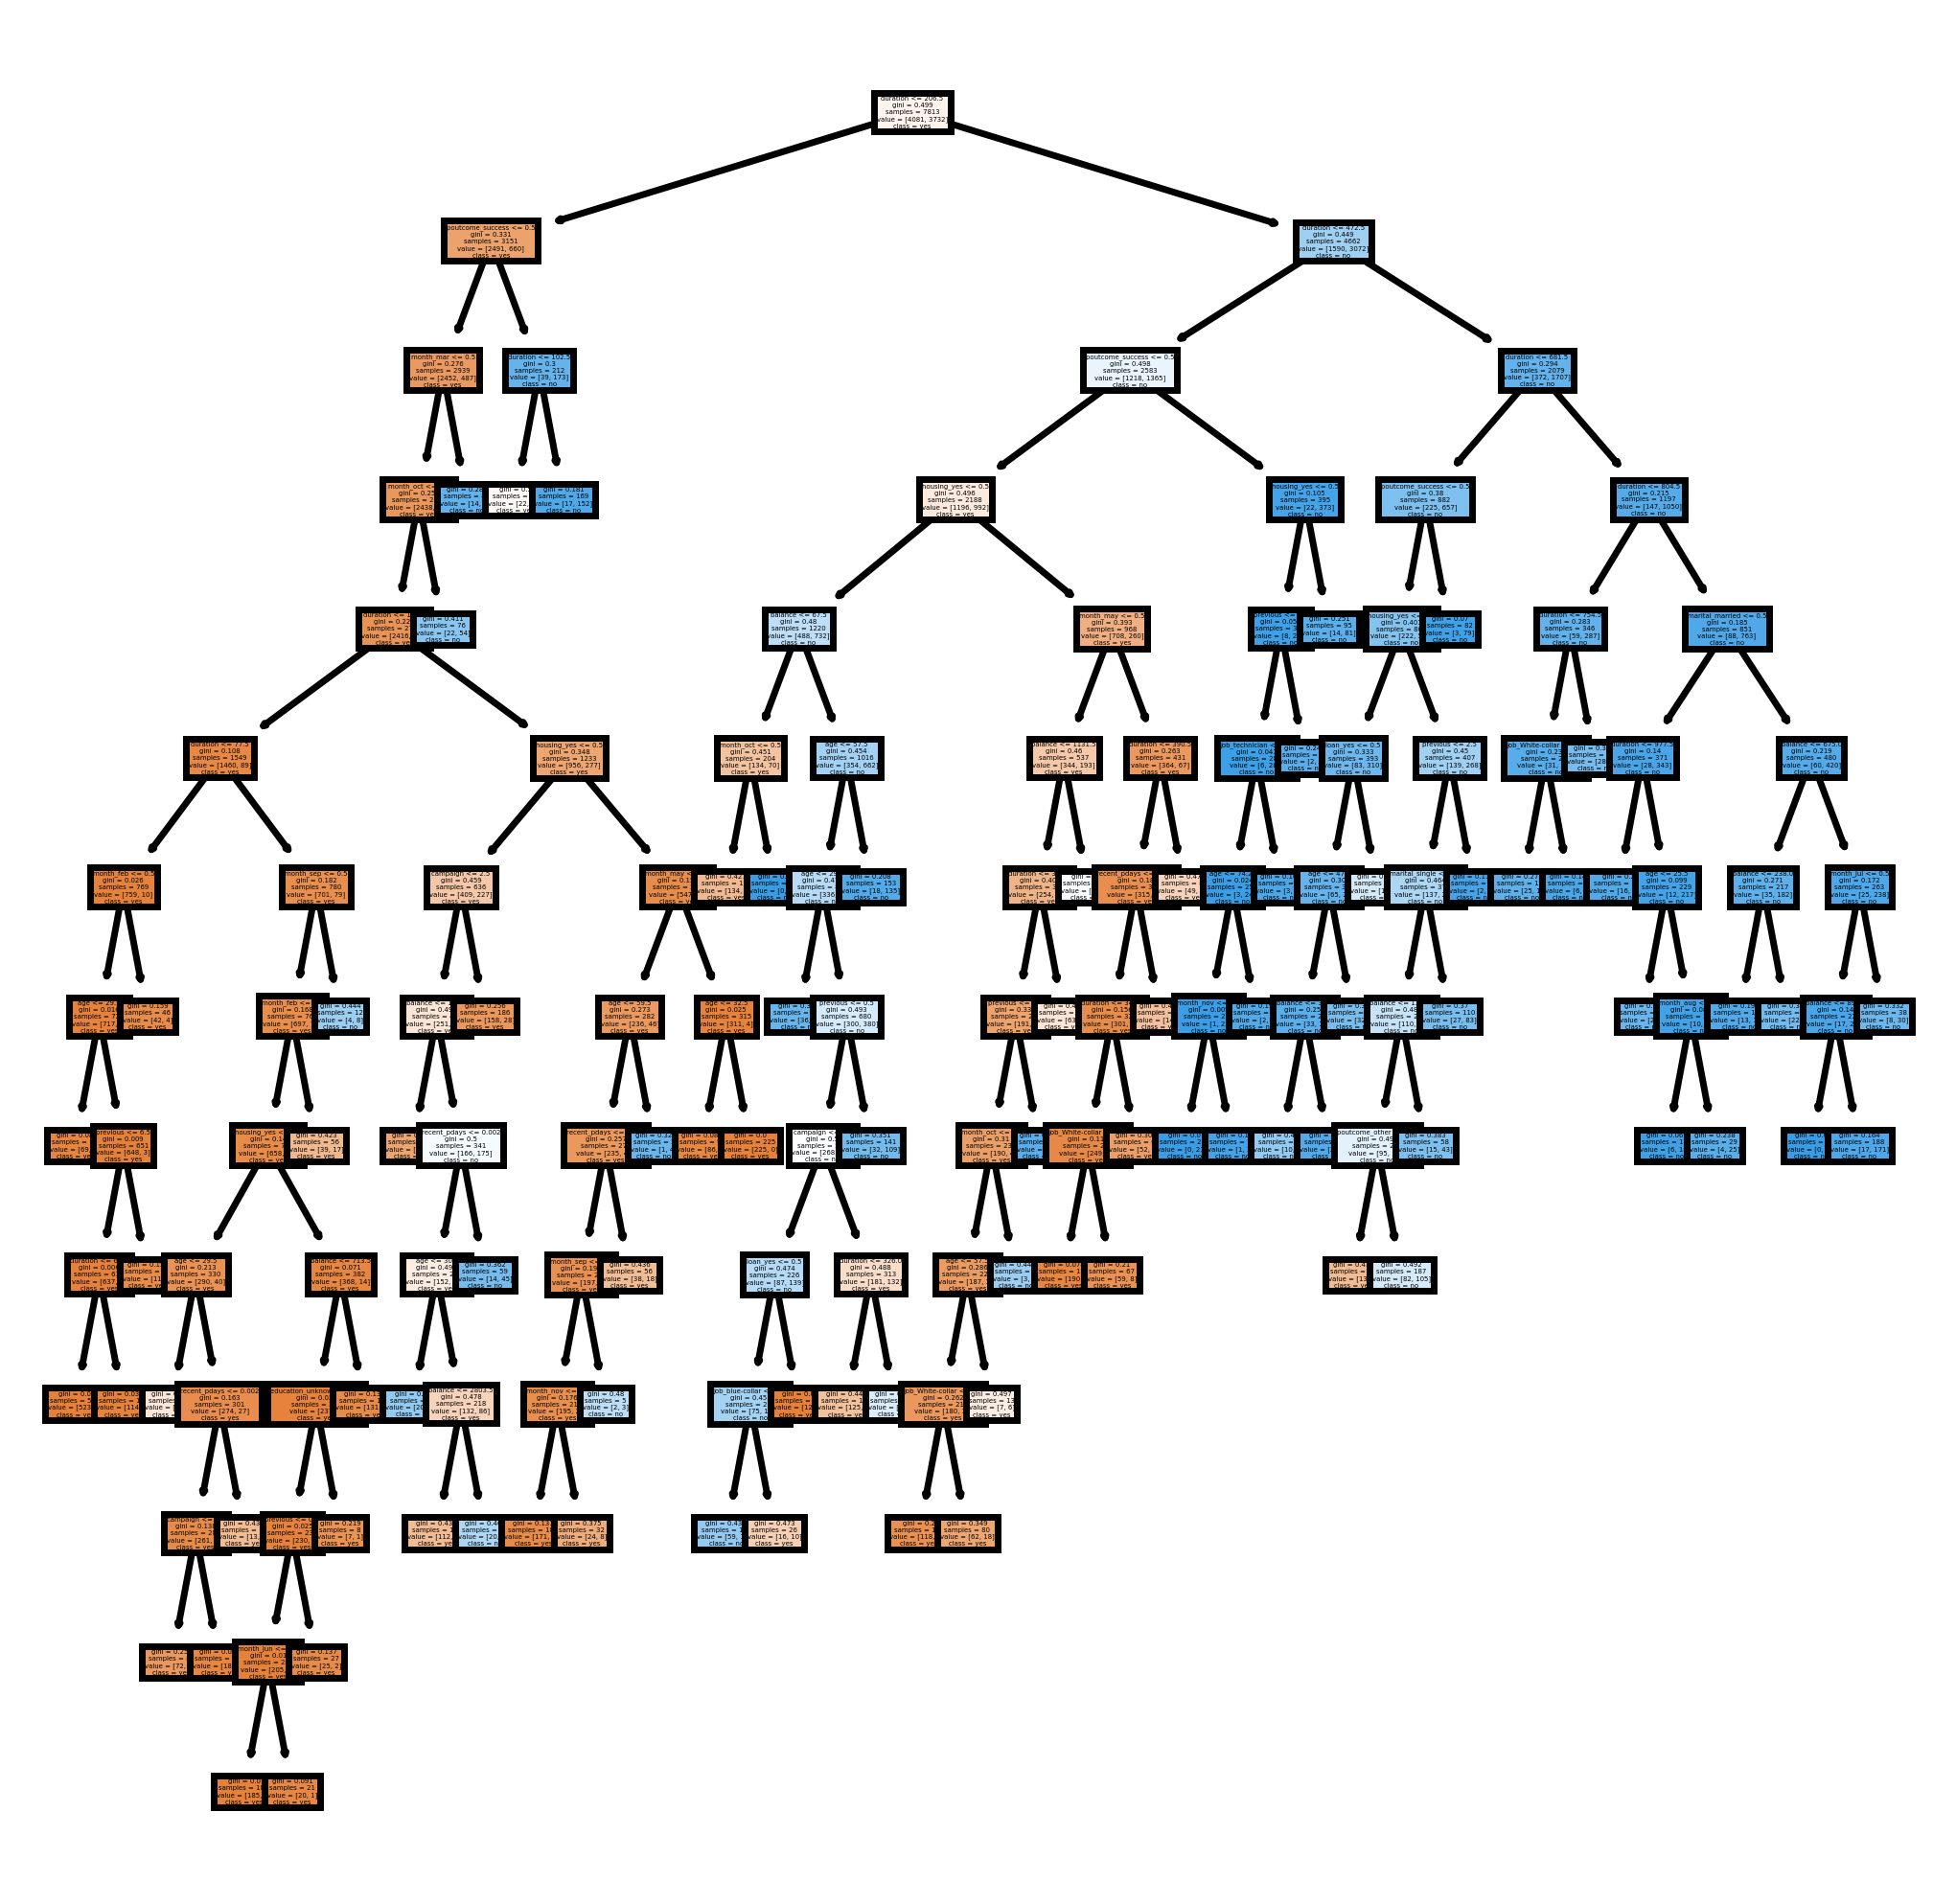

In [126]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']

# setting dpi=300
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=500)


dt_plot=plot_tree(dt_f,feature_names=fn,class_names=cn,filled=True);

### Feature importance

In [122]:
dt_f.feature_importances_

array([3.04136758e-02, 3.76949929e-02, 5.30590055e-01, 1.68090920e-02,
       1.43622923e-02, 8.69690679e-03, 1.28022847e-03, 2.07192084e-03,
       0.00000000e+00, 0.00000000e+00, 1.74113790e-04, 5.12053838e-04,
       2.27047743e-03, 0.00000000e+00, 0.00000000e+00, 9.69957676e-05,
       0.00000000e+00, 8.77536005e-02, 7.15215829e-03, 2.83872081e-04,
       0.00000000e+00, 2.95266718e-03, 0.00000000e+00, 5.90762497e-04,
       4.26587746e-05, 3.63538093e-02, 1.32793611e-02, 9.22878544e-04,
       3.13701892e-02, 5.11847813e-03, 1.03869783e-03, 1.68168062e-01])

In [123]:
feat_imp=pd.DataFrame({'Variable':x_train.columns,'importance':dt_f.feature_importances_}).sort_values(by='importance',ascending=False)

In [124]:
feat_imp[feat_imp['importance']>=0.01]['Variable'].unique()

array(['duration', 'poutcome_success', 'housing_yes', 'balance',
       'month_mar', 'month_oct', 'age', 'campaign', 'previous',
       'month_may'], dtype=object)

In [125]:
x_train1=x_train[['duration', 'poutcome_success', 'housing_yes', 'balance',
       'month_mar', 'month_oct', 'age', 'campaign', 'previous',
       'month_may']]
x_test1=x_test[['duration', 'poutcome_success', 'housing_yes', 'balance',
       'month_mar', 'month_oct', 'age', 'campaign', 'previous',
       'month_may']]

In [126]:
dt_f=DecisionTreeClassifier(max_depth=14, min_samples_leaf=5, min_samples_split=200,criterion='gini')
dt_f.fit(x_train1,y_train)
print('Train Accuracy',dt_f.score(x_train1,y_train)*100)
print('Train Accuracy',dt_f.score(x_test1,y_test)*100)

Train Accuracy 82.52911813643927
Train Accuracy 80.44192296207822


In [127]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)

In [128]:
prob_train=dt_f.predict_proba(x_train1)[:,1]
prob_test=dt_f.predict_proba(x_test1)[:,1]

In [130]:
from sklearn import metrics

In [131]:
metrics.accuracy_score(y_train,pred_train)
metrics.accuracy_score(y_test,pred_test)

0.8044192296207823

In [132]:
metrics.recall_score(y_train,pred_train)
metrics.recall_score(y_test,pred_test)

0.8265895953757225

In [133]:
metrics.f1_score(y_train,pred_train)
metrics.f1_score(y_test,pred_test)

0.7971508206875195

In [134]:
metrics.roc_auc_score(y_train,pred_train)

0.8265860234327747

In [135]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [136]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    roc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy" : ac1, "Recall" : rc1, "Precision": pc1, "F1_score" : f1 , "Auc": roc1}
    
    fpr, tpr, threshold=metrics.roc_curve(act, probs)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()
    return result

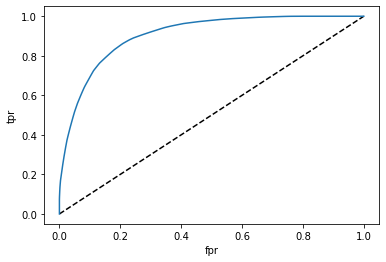

{'Accuracy': 0.8252911813643927,
 'Recall': 0.8555734190782422,
 'Precision': 0.7944762378701169,
 'F1_score': 0.8238936911366275,
 'Auc': 0.8265860234327747}

In [137]:
classification_eva(y_train,pred_train,probs=prob_train_1)

In [138]:
def profile_decile(X,y,trained_model):
    """logistic regression decile analysis divides the data into 10 parts and then do analysis"""
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [139]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59.0,White-collar,married,secondary,no,2343.0,yes,no,may,1033.0,1,0,other,1,0.001001
1,56.0,White-collar,married,secondary,no,45.0,no,no,may,1033.0,1,0,other,1,0.001001
2,41.0,technician,married,secondary,no,1270.0,yes,no,may,1033.0,1,0,other,1,0.001001
3,55.0,Pink-collar,married,secondary,no,2476.0,yes,no,may,579.0,1,0,other,1,0.001001
4,54.0,White-collar,married,tertiary,no,184.0,no,no,may,673.0,2,0,other,1,0.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1.0,yes,no,apr,257.0,1,0,other,0,0.001001
11158,39.0,Pink-collar,married,secondary,no,733.0,no,no,jun,83.0,4,0,other,0,0.001001
11159,32.0,technician,single,secondary,no,29.0,no,no,aug,156.0,2,0,other,0,0.001001
11160,43.0,technician,married,secondary,no,0.0,no,yes,may,9.0,2,5,failure,0,0.003297
